# Naive Bees Deep Learning with Images
#### Part 3 of 3
*A Datacamp Project*

### Project Description

Can a machine distinguish between a honey bee and a bumble bee? These bees have different <a href="https://www.thesca.org/connect/blog/bumblebees-vs-honeybees-what%E2%80%99s-difference-and-why-does-it-matter">behaviors and appearances</a>, but given the variety of backgrounds, positions, and image resolutions, it can be a challenge for machines to tell them apart.</p> 
Being able to identify bee species from images, while challenging, would allow researchers to more quickly and effectively collect field data. Pollinating bees have critical roles in both ecology and agriculture, and diseases like <a href="http://news.harvard.edu/gazette/story/2015/07/pesticide-found-in-70-percent-of-massachusetts-honey-samples/">colony collapse disorder</a> threaten these species. Identifying different species of bees in the wild means that we can better understand the prevalence and growth of these important insects.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_412/img/20_notebook.jpg" alt="bumble bee">
<em>A bumble bee (Bombus).</em></p>

In this project, you will build a simple deep learning model that can automatically detect honey bees and bumble bees, then load a pre-trained model for evaluation. You will use <i><strong>keras, scikit-learn, scikit-image</i></strong>, and numpy, among other popular Python libraries.

<p><img src="https://backyardbeekeeping101.com/wp-content/uploads/2019/06/Honey-Bee-Vs-Honey-Bees-Size-and-Shape.jpg" alt="honey bee and bumble bee", style = "width:300px"> 
</p>

This project is the <strong>third</strong> part of a series of projects that walk through working with image data, building classifiers using traditional techniques, and leveraging the power of deep learning for computer vision.

## 1. Import Python libraries
<p><img src="https://assets.datacamp.com/production/project_555/img/92_notebook.jpg" alt="honey bee">
<em>A honey bee (Apis).</em></p>
<p>Can a machine identify a bee as a honey bee or a bumble bee? These bees have different <a href="https://www.thesca.org/connect/blog/bumblebees-vs-honeybees-what%E2%80%99s-difference-and-why-does-it-matter">behaviors and appearances</a>, but given the variety of backgrounds, positions, and image resolutions, it can be a challenge for machines to tell them apart.</p>
<p>Being able to identify bee species from images is a task that ultimately would allow researchers to more quickly and effectively collect field data. Pollinating bees have critical roles in both ecology and agriculture, and diseases like <a href="http://news.harvard.edu/gazette/story/2015/07/pesticide-found-in-70-percent-of-massachusetts-honey-samples/">colony collapse disorder</a> threaten these species. Identifying different species of bees in the wild means that we can better understand the prevalence and growth of these important insects.</p>
<p><img src="https://assets.datacamp.com/production/project_555/img/20_notebook.jpg" alt="bumble bee">
<em>A bumble bee (Bombus).</em></p>
<p>This notebook walks through building a simple deep learning model that can automatically detect honey bees and bumble bees and then loads a pre-trained model for evaluation.</p>

In [1]:
# library

import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# import tensorflow and keras library
import keras
import tensorflow

# import Sequential from the keras models module
# Note: you may not need "tensorflow." depending on your tensorflow version
from tensorflow.keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
# Note: you may not need "tensorflow." depending on your tensorflow version
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 2. Load image labels
<p>Now that we have all of our imports ready, it is time to look at the labels for our data. We will load our <code>labels.csv</code> file into a DataFrame called <code>labels</code>, where the index is the image name (e.g. an index of 1036 refers to an image named 1036.jpg) and the <code>genus</code> column tells us the bee type. <code>genus</code> takes the value of either <code>0.0</code> (Apis or honey bee) or <code>1.0</code> (Bombus or bumble bee).</p>

In [2]:
import pandas as pd
# load labels.csv from datasets folder using pandas
labels = pd.read_csv('../Naive Bees Predict Species from Images/datasets/labels.csv', index_col=0)
display(labels.head(3))

# print value counts for genus
# print(labels['genus'].value_counts)
print(labels.genus.values)

# assign the genus label values to y
y = labels['genus'].values

,genus
id,
520,1.0
3800,1.0
3289,1.0


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## 3. Examine RGB values in an image matrix
<p>Image data can be represented as a matrix. The width of the matrix is the width of the image, the height of the matrix is the height of the image, and the depth of the matrix is the number of channels. Most image formats have three color channels: red, green, and blue.</p>
<p>For each pixel in an image, there is a value for every channel. The combination of the three values corresponds to the color, as per the <a href="https://en.wikipedia.org/wiki/RGB_color_model">RGB color model</a>. Values for each color can range from 0 to 255, so a purely blue pixel would show up as (0, 0, 255).</p>
<p><img src="https://assets.datacamp.com/production/project_555/img/rgb_example.png" width="600"></p>
<p>Let's explore the data for a sample image. </p>

Example image has shape:  (200, 200, 3)
RGB values for the top left pixel are: [129 109 102]


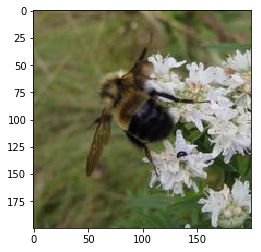

In [3]:
# load an image and explore
example_image = io.imread('../Naive Bees Predict Species from Images/datasets/{}.jpg'.format(labels.index[0]))

# show image
plt.imshow(example_image)

# print shape
print('Example image has shape: ', example_image.shape)
                    
# print color channel values for top left pixel
print('RGB values for the top left pixel are:', example_image[0, 0, :])

## 4. Normalize image data
<p>Now we need to normalize our image data. Normalization is a general term that means changing the scale of our data so it is consistent.</p>
<p>In this case, we want each feature to have a similar range so our neural network can learn effectively across all the features. As explained in the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">sklearn docs</a>, "If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected."</p>
<p>We will scale our data so that it has a mean of 0 and standard deviation of 1. We'll use sklearn's <code>StandardScaler</code> to do the math for us, which entails taking each value, subtracting the mean, and then dividing by the standard deviation. We need to do this for each color channel (i.e. each feature) individually. </p>

In [4]:
# initialize standard scaler
ss = StandardScaler()

image_list = []
for i in labels.index:
    # load image
    img = io.imread('../Naive Bees Predict Species from Images/datasets/{}.jpg'.format(i)).astype(np.float64)
    # for each channel, apply standard scaler's fit_transform method
    for channel in range(img.shape[2]):
        img[:, :, channel] = ss.fit_transform(img[:, :, channel])  
    # append to list of all images
    image_list.append(img)

    
# convert image list to single array
X = np.array(image_list)

# print shape of X
print(X.shape)


(500, 200, 200, 3)


## 5. Split into train, test, and evaluation sets
<p>Now that we have our big image data matrix, <code>X</code>, as well as our labels, <code>y</code>, we can split our data into train, test, and evaluation sets. To do this, we'll first allocate 20% of the data into our evaluation, or holdout, set. This is data that the model never sees during training and will be used to score our trained model.</p>
<p>We will then split the remaining data, 60/40, into train and test sets just like in supervised machine learning models. We will pass both the train and test sets into the neural network. </p>

In [5]:
# split out evaluation sets (x_eval and y_eval)
x_interim, x_eval, y_interim, y_eval = train_test_split(X,y,test_size=.2,random_state=52)

# split remaining data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_interim,y_interim,test_size=.4,random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.size, 'train samples')
print(x_test.shape[0], 'test samples')
print(x_eval.shape[0], 'eval samples')

x_train shape: (240, 200, 200, 3)
28800000 train samples
160 test samples
100 eval samples


## 6. Model building (part i)
<p>It's time to start building our deep learning model, a convolutional neural network (CNN). CNNs are a specific kind of artificial neural network that is very effective for image classification because they are able to take into account the spatial coherence of the image, i.e., that pixels close to each other are often related.</p>
<p>Building a CNN begins with specifying the model type. In our case, we'll use a <a href="https://keras.io/getting-started/sequential-model-guide/">Sequential</a> model, which is a linear stack of layers. We'll then add two convolutional layers. To understand convolutional layers, imagine a flashlight being shown over the top left corner of the image and slowly sliding across all the areas of the image, moving across the image in the same way your eyes move across words on a page. Convolutional layers pass a kernel (a sliding window) over the image and perform element-wise matrix multiplication between the kernel values and the pixel values in the image.</p>

In [6]:
# set model constants
num_classes = 1

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)))

# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)))


## 7. Model building (part ii)
<p>Let's continue building our model. So far our model has two convolutional layers. However, those are not the only layers that we need to perform our task. A complete neural network architecture will have a number of other layers that are designed to play a specific role in the overall functioning of the network. Much deep learning research is about how to structure these layers into coherent systems.</p>
<p>We'll add the following layers:</p>
<ul>
<li><a href="https://keras.io/layers/pooling/#maxpooling2d"><code>MaxPooling</code></a>. This passes a (2, 2) moving window over the image and downscales the image by outputting the maximum value within the window.</li>
<li><a href="https://keras.io/layers/convolutional/#conv2d"><code>Conv2D</code></a>. This adds a third convolutional layer since deeper models, i.e. models with more convolutional layers, are better able to learn features from images.</li>
<li><a href="https://keras.io/layers/core/#dropout"><code>Dropout</code></a>. This prevents the model from overfitting, i.e. perfectly remembering each image, by randomly setting 25% of the input units to 0 at each update during training.</li>
<li><a href="https://keras.io/layers/core/#flatten"><code>Flatten</code></a>. As its name suggests, this flattens the output from the convolutional part of the CNN into a one-dimensional feature vector which can be passed into the following fully connected layers.</li>
<li><a href="https://keras.io/layers/core/#dense"><code>Dense</code></a>. Fully connected layer where every input is connected to every output (see image below).</li>
<li><a href="https://keras.io/layers/core/#dropout"><code>Dropout</code></a>. Another dropout layer to safeguard against overfitting, this time with a rate of 50%.</li>
<li><code>Dense</code>. Final layer which calculates the probability the image is either a bumble bee or honey bee.</li>
</ul>
<p>To take a look at how it all stacks up, we'll print the model summary. Notice that our model has a whopping <code>3,669,249</code> paramaters. These are the different weights that the model learns through training and what are used to generate predictions on a new image.</p>
<p><img src="https://assets.datacamp.com/production/project_555/img/mlp_conv.png" alt=""></p>

In [7]:
# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))
# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation='sigmoid', name='preds'))

# show model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 589824)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

## 8. Compile and train model
<p>Now that we've specified the model architecture, we will <a href="https://keras.io/models/model/#compile">compile</a> the model for training. For this we need to specify the loss function (what we're trying to minimize), the optimizer (how we want to go about minimizing the loss), and the metric (how we'll judge the performance of the model).</p>
<p>Then, we'll call <a href="https://keras.io/models/model/#fit"><code>.fit</code></a> to begin the trainig the process. </p>
<blockquote>
  <p>"Neural networks are trained iteratively using optimization techniques like gradient descent. After each cycle of training, an error metric is calculated based on the difference between prediction and target...Each neuron’s coefficients (weights) are then adjusted relative to how much they contributed to the total error. This process is repeated iteratively." <a href="https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html">ML Cheatsheet</a></p>
</blockquote>
<p>Since training is computationally intensive, we'll do a 'mock' training to get the feel for it, using just the first 10 images in the train and test sets and training for just 5 epochs. Epochs refer to the number of iterations over the data. Typically, neural networks will train for hundreds if not thousands of epochs.</p>
<p>Take a look at the printout for each epoch and note the loss on the train set (<code>loss</code>), the accuracy on the train set (<code>acc</code>), and loss on the test set (<code>val_loss</code>) and the accuracy on the test set (<code>val_acc</code>). We'll explore this more in a later step.</p>

In [8]:
model.compile(
    # set the loss as binary_crossentropy
    loss=tensorflow.keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=tensorflow.keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)

# mock-train the model using the first ten observations of the train and test sets
history=model.fit(
    x_train[:10, :, :, :],
    y_train[:10],
    epochs=5,
    verbose=1,
    validation_data=(x_test[:10, :, :, :], y_test[:10])
)




Train on 10 samples, validate on 10 samples
Epoch 1/5
10/10 [==============================] - 3s 272ms/sample - loss: 0.6537 - accuracy: 0.7000 - val_loss: 0.7797 - val_accuracy: 0.4000
Epoch 2/5
10/10 [==============================] - 2s 164ms/sample - loss: 0.5665 - accuracy: 0.7000 - val_loss: 0.7554 - val_accuracy: 0.4000
Epoch 3/5
10/10 [==============================] - 2s 159ms/sample - loss: 0.5347 - accuracy: 0.8000 - val_loss: 0.7941 - val_accuracy: 0.4000
Epoch 4/5
10/10 [==============================] - 2s 159ms/sample - loss: 0.4948 - accuracy: 0.7000 - val_loss: 0.7733 - val_accuracy: 0.4000
Epoch 5/5
10/10 [==============================] - 2s 157ms/sample - loss: 0.4182 - accuracy: 0.9000 - val_loss: 0.6811 - val_accuracy: 0.6000


Note: I was unable to down the pretrained_cnn.h5 and model_history.pkl. Therefore I created these files myself. As a result, the end charts will look different. 

In [9]:
model.save('pretrained_cnn.h5')
with open('model_history.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

## 9. Load pre-trained model and score
<p>Now we'll load a pre-trained model that has the architecture we specified above and was trained for 200 epochs on the full train and test sets we created above.</p>
<p>Let's use the <a href="https://keras.io/models/model/#evaluate"><code>evaluate</code></a> method to see how well the model did at classifying bumble bees and honey bees for the test and validation sets.  Recall that accuracy is the number of correct predictions divided by the total number of predictions. Given that our classes are balanced, a model that predicts <code>1.0</code> for every image would get an accuracy around <code>0.5</code>.</p>
<p>Note: it may take a few seconds to load the model. Recall that our model has over 3 million parameters (weights), which are what's being loaded.</p>

In [10]:
# load pre-trained model
pretrained_cnn =  tensorflow.keras.models.load_model('pretrained_cnn.h5') #pretrained_model

# evaluate model on test set
score = pretrained_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(x_eval, y_eval)
# print loss score
print('Eval loss:', eval_score[0])
# print accuracy score
print('Eval accuracy:', eval_score[1])

Test loss: 0.6849887251853943
Test accuracy: 0.54375

100/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## 10. Visualize model training history
<p>In addition to scoring the final iteration of the pre-trained model as we just did, we can also see the evolution of scores throughout training thanks to the <a href="https://keras.io/callbacks/#history"><code>History</code></a> object. We'll use the <a href="https://docs.python.org/3/library/pickle.html"><code>pickle</code></a> library to load the model history and then plot it.</p>
<p>Notice how the accuracy improves over time, eventually leveling off. Correspondingly, the loss decreases over time. Plots like these can help diagnose overfitting. If we had seen an upward curve in the validation loss as times goes on (a U shape in the plot), we'd suspect that the model was starting to memorize the test set and would not generalize well to new data.</p>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 

The below charts will look different as they are not from the actual pretrained_cnn.h5 and model_history.pkl files.


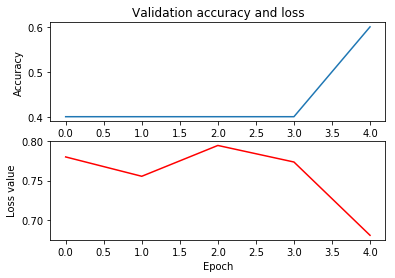

In [15]:
# load history
with open('model_history.pkl', 'rb') as f:
    pretrained_cnn_history = pickle.load(f)

# print keys for pretrained_cnn_history dict
# for key in pretrained_cnn_history:
#     print ("The key name is " + key)
print(pretrained_cnn_history.keys(),'\n')

print('The below charts will look different as they are not from the actual pretrained_cnn.h5 and model_history.pkl files.')

fig = plt.figure(1)
plt.subplot(211)
# plot the validation accuracy
plt.plot(pretrained_cnn_history['val_accuracy'])
plt.title('Validation accuracy and loss')
plt.ylabel('Accuracy')
plt.subplot(212)
# plot the validation loss
plt.plot(pretrained_cnn_history['val_loss'], 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss value');



## 11. Generate predictions
<p>Previously, we calculated an overall score for our pre-trained model on the validation set. To end this notebook, let's access probabilities and class predictions for individual images using the <code>.predict</code> and <code>.predict_classes</code> methods.</p>
<p>We now have a deep learning model that can be used to identify honey bees and bumble bees in images! The next step is to explore transfer learning, which harnesses the prediction power of models that have been trained on far more images than the mere 1600 in our dataset.</p>

In [12]:
# predicted probabilities for x_eval
y_proba = pretrained_cnn.predict(x_eval)

print("First five probabilities:")
print(y_proba[:5])
print("")

# predicted classes for x_eval
y_pred = pretrained_cnn.predict_classes(x_eval)


print("First five class predictions:")
print(y_pred[:5])
print("")

First five probabilities:
[[0.47124103]
 [0.45681742]
 [0.47331393]
 [0.409936  ]
 [0.4304307 ]]

First five class predictions:
[[0]
 [0]
 [0]
 [0]
 [0]]

